https://www.kaggle.com/korfanakis/titanic-a-beginner-friendly-approach-to-top-3

# I - Loading the Data

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

import warnings
warnings.filterwarnings('ignore')

print('Library Loaded !')

Library Loaded !


In [37]:
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')

print('Data Loaded')
print('Training set :',data_train.shape[0],'rows and',data_train.shape[1],'columns')
print('Testing set :',data_test.shape[0],'rows and',data_test.shape[1],'columns')

Data Loaded
Training set : 891 rows and 12 columns
Testing set : 418 rows and 11 columns


In [38]:
print("Number of survivor :")
print((data_train.Survived == 1).sum(),'/',len(data_train.Survived))

Number of survivor :
342 / 891


In [39]:
#Merge all the datas
data_all = pd.concat([data_train,data_test])

# II- Visualize the Data

In [5]:
data_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [6]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
#Missing Values

In [8]:
mv_index, mv_number = [] , []
for col in data_all.columns:
    if (col != 'Survived'):
        if (data_all[col].isna().sum() >0):
            mv_index.append(col)
            mv_number.append(data_all[col].isna().sum()/len(data_all[col]))
missing_values = pd.Series(mv_number, index=mv_index).sort_values(ascending=False)
print(missing_values)
    

Cabin       0.774637
Age         0.200917
Embarked    0.001528
Fare        0.000764
dtype: float64


In [9]:
data_all.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffcebdb0048>,
      dtype=object)

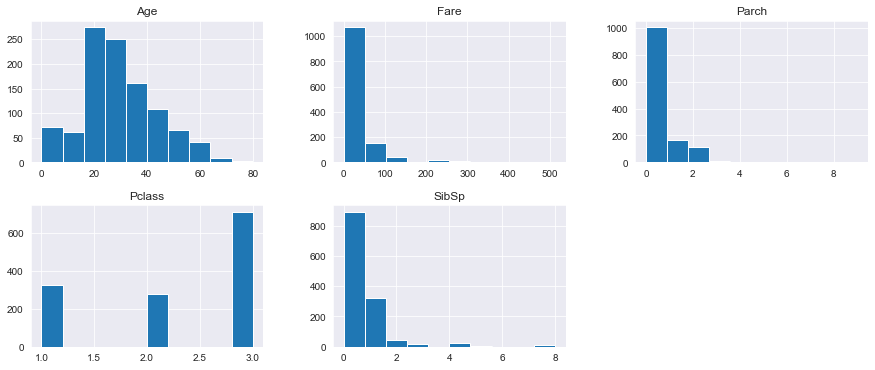

In [10]:
hist_index = ['Age','Fare','Parch','Pclass','SibSp']
data_all[hist_index].hist(figsize = (15, 6),layout = (2,3))

# III - Exploring the Data

## 1. Gender

Text(0.5, 1.0, 'Pourcentage of Survivors by Gender')

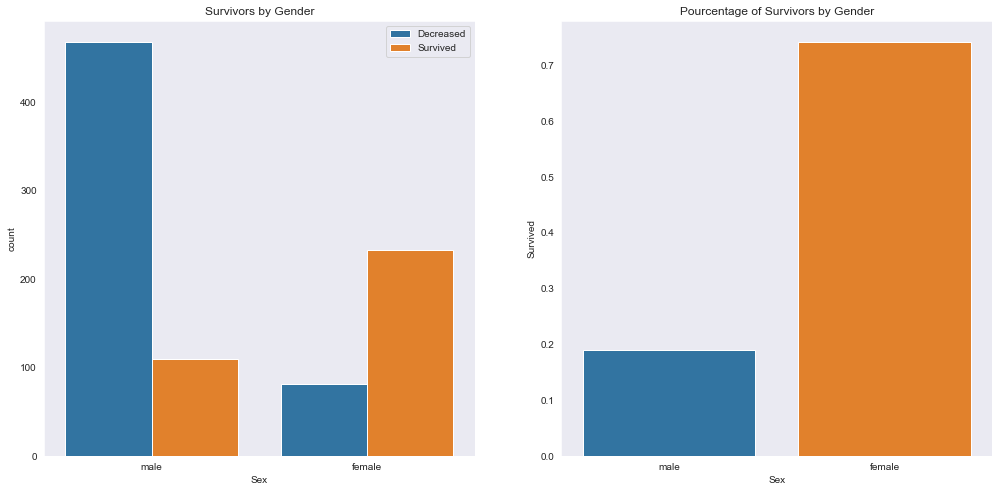

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(17,8))

sns.countplot(x='Sex',hue='Survived',data=data_train,ax=ax1)
ax1.set_title('Survivors by Gender')
ax1.legend(['Decreased','Survived'])

sns.barplot(x = 'Sex', y= 'Survived',data=data_train,ax=ax2,ci=None)
ax2.set_title('Pourcentage of Survivors by Gender')

In [12]:
pd.crosstab(data_train['Sex'], data_train['Survived'], normalize = 'index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


##  2. Age

In [13]:
men = data_train[data_train.Sex == 'male']
women = data_train[data_train.Sex == 'female']

Text(0.5, 1.0, 'Age Distribution - Women')

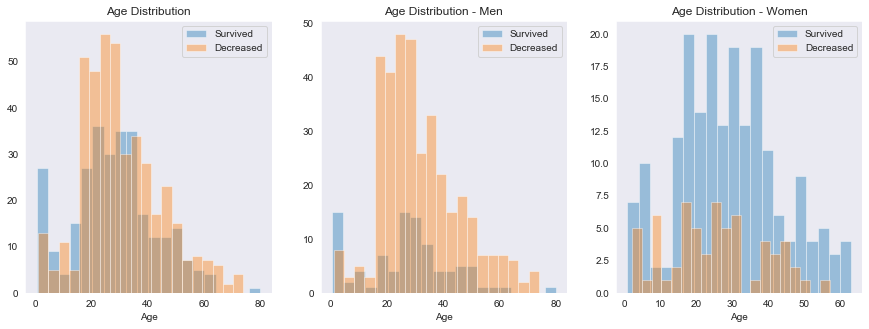

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))

sns.distplot(data_train.Age[data_train.Survived == 1].dropna(),label='Survived',ax=ax1,bins=20,kde=False)
sns.distplot(data_train.Age[data_train.Survived == 0].dropna(),label='Decreased',ax=ax1,bins=20,kde=False)
ax1.legend()
ax1.set_title('Age Distribution')

sns.distplot(men.Age[men.Survived == 1].dropna(),label='Survived',ax=ax2,bins=20,kde=False)
sns.distplot(men.Age[men.Survived == 0].dropna(),label='Decreased',ax=ax2,bins=20,kde=False)
ax2.legend()
ax2.set_title('Age Distribution - Men')

sns.distplot(women.Age[women.Survived == 1].dropna(),label='Survived',ax=ax3,bins=20,kde=False)
sns.distplot(women.Age[women.Survived == 0].dropna(),label='Decreased',ax=ax3,bins=20,kde=False)
ax3.legend()
ax3.set_title('Age Distribution - Women')

## 3. Port of embarkation

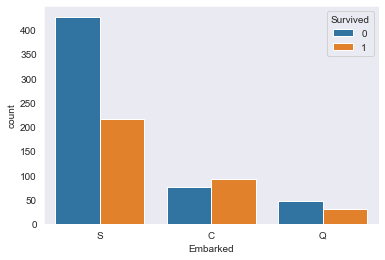

In [15]:
sns.countplot( x = 'Embarked', hue = 'Survived', data=data_train)

## 4. Class

In [16]:
data_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Rate of surviving by class')

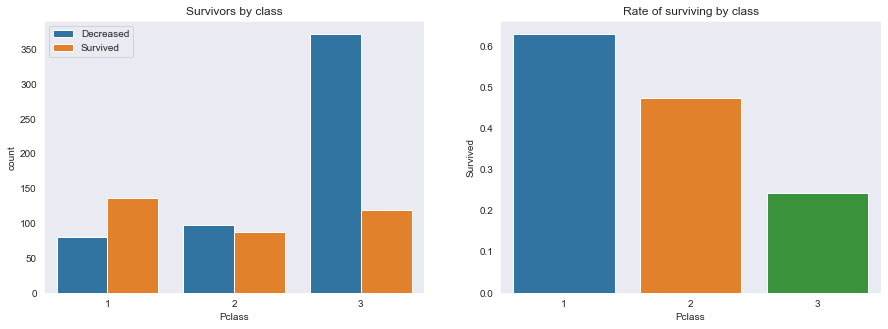

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))

sns.countplot(x='Pclass', hue='Survived', data=data_train, ax = ax1)
ax1.set_title('Survivors by class')
ax1.legend(['Decreased','Survived'])

sns.barplot(x='Pclass', y='Survived', data=data_train, ax = ax2 , ci=False)
ax2.set_title('Rate of surviving by class')

## 5. Fare

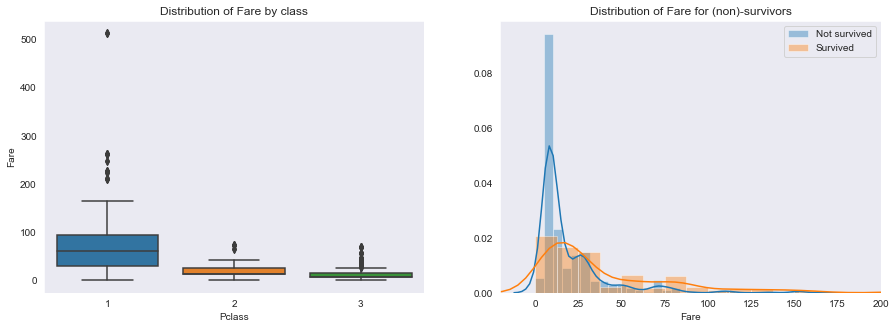

In [18]:
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

sns.boxplot( x = 'Pclass', y='Fare', data=data_train, ax = ax1)
ax1.set_title('Distribution of Fare by class')

sns.distplot(data_train[data_train.Survived == 0].Fare, label = 'Not survived', ax=ax2)
sns.distplot(data_train[data_train.Survived == 1].Fare, label = 'Survived', ax=ax2)
ax2.set_title('Distribution of Fare for (non)-survivors')
ax2.set_xlim([-20, 200])
ax2.legend()

In [19]:
data_train['Fare_Bin'] = pd.qcut(data_train.Fare,5)
data_train[['Fare_Bin','Survived']].groupby('Fare_Bin').mean()

,Survived
Fare_Bin,
"(-0.001, 7.854]",0.217877
"(7.854, 10.5]",0.201087
"(10.5, 21.679]",0.424419
"(21.679, 39.688]",0.444444
"(39.688, 512.329]",0.642045


## 6. SibSp and Parch

In [20]:
alone = data_train[ (data_train.SibSp == 0 ) & (data_train.Parch == 0) ]  
not_alone = data_train[ (data_train.SibSp != 0 ) | (data_train.Parch != 0) ] 

Text(0.5, 1.0, 'Survivors travelling not_alone')

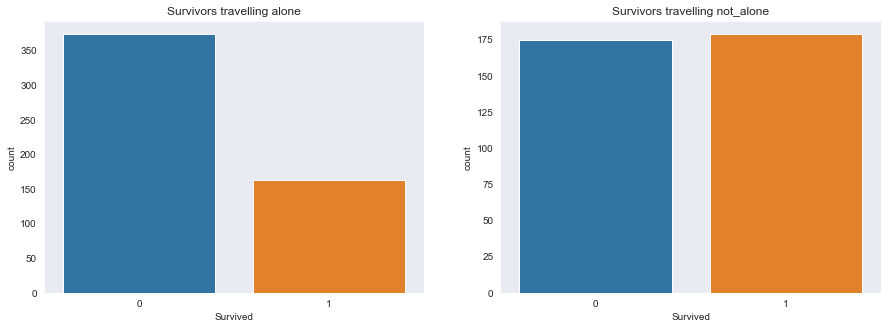

In [21]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x='Survived', data = alone, ax = ax1)
ax1.set_title('Survivors travelling alone')

sns.countplot(x='Survived', data = not_alone, ax = ax2)
ax2.set_title('Survivors travelling not_alone')

Survivors travelling not alone have more chance to survive

Text(0.5, 0.98, 'Rate of Survivors by size of family')

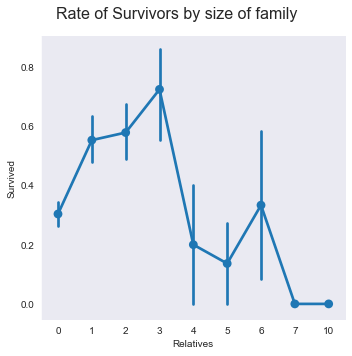

In [22]:
data_train['Relatives'] = data_train.SibSp + data_train.Parch

g = sns.factorplot(x='Relatives', y='Survived', data= data_train)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Rate of Survivors by size of family', fontsize=16)

Family of 1 to 3 members have more chance to survive

## 7. Title

In [23]:
data_train['Title'] = data_train['Name'].apply(lambda x: (x.split('.')[0]).split()[-1])

In [24]:
normalized_titles = {
    "Capt":       "Rare Title",
    "Col":        "Rare Title",
    "Major":      "Rare Title",
    "Jonkheer":   "Rare Title",
    "Don":        "Rare Title",
    "Sir" :       "Rare Title",
    "Dr":         "Rare Title",
    "Rev":        "Rare Title",
    "Countess":   "Rare Title",
    "Dona":       "Rare Title",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Miss",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Rare Title"
}

data_train.Title = data_train.Title.map(normalized_titles)

In [25]:
data_train.Title.value_counts()

Mr            517
Miss          185
Mrs           126
Master         40
Rare Title     23
Name: Title, dtype: int64

Text(0.5, 1.0, 'Rate of survivors by title')

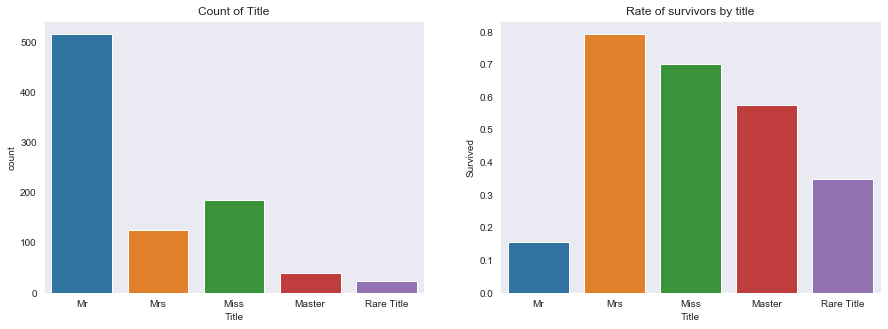

In [26]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot( x ='Title', data=data_train, ax=ax1 )
ax1.set_title('Count of Title')

sns.barplot(x = 'Title' , y='Survived' , data=data_train , ax=ax2, ci = False)
ax2.set_title('Rate of survivors by title')

Mrs, Miss, Master have a high rate of surviving, Rare Title medium rate and Mr low rate

# IV - Preparing the data

Feel NaN value for Age and Fare

In [40]:
data_all.Age = data_all.Age.fillna(data_train.Age.median())
data_all.Fare = data_all.Fare.fillna(data_train.Fare.median())

Features engenering : 'Family_Survival', 'Age_Bin', 'Fare_Bin', 'Relatives', 'Title'

In [41]:
data_all['Title'] = data_all['Name'].apply(lambda x: (x.split('.')[0]).split()[-1])

normalized_titles = {
    "Capt":       "Rare Title",
    "Col":        "Rare Title",
    "Major":      "Rare Title",
    "Jonkheer":   "Rare Title",
    "Don":        "Rare Title",
    "Sir" :       "Rare Title",
    "Dr":         "Rare Title",
    "Rev":        "Rare Title",
    "Countess":   "Rare Title",
    "Dona":       "Rare Title",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Miss",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Rare Title"
}

data_all.Title = data_all.Title.map(normalized_titles)

data_all['Relatives'] = data_all.SibSp + data_all.Parch

data_all['Age_Bin'] = (data_all['Age']//15)*15

data_all['Fare_Bin'] = pd.qcut(data_all.Fare,5)

#Faimily_Survival comes from this kernel https://www.kaggle.com/konstantinmasich/titanic-0-82-0-83/notebook

data_all['Last_Name'] = data_all['Name'].apply(lambda x: str.split(x, ",")[0])
data_all['Fare'].fillna(data_all['Fare'].mean(), inplace=True)

DEFAULT_SURVIVAL_VALUE = 0.5
data_all['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in data_all[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1):
        # A Family group is found.
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                data_all.loc[data_all['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                data_all.loc[data_all['PassengerId'] == passID, 'Family_Survival'] = 0

print("Number of passengers with family survival information:", 
      data_all.loc[data_all['Family_Survival']!=0.5].shape[0])

Number of passengers with family survival information: 420


In [42]:
data_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Relatives,Age_Bin,Fare_Bin,Last_Name,Family_Survival
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1,15.0,"(-0.001, 7.854]",Braund,0.5
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1,30.0,"(41.579, 512.329]",Cumings,0.5
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,15.0,"(7.854, 10.5]",Heikkinen,0.5
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1,30.0,"(41.579, 512.329]",Futrelle,0.0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0,30.0,"(7.854, 10.5]",Allen,0.5


Encoding 'Fare_Bin', 'Age_Bin', 'Title' and 'Sex'.

In [43]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler 

In [44]:
data_all.Fare_Bin = LabelEncoder().fit_transform(data_all.Fare_Bin)
data_all.Age_Bin = LabelEncoder().fit_transform(data_all.Age_Bin)
data_all['Title_Bin'] = LabelEncoder().fit_transform(data_all.Title)
data_all.Sex = LabelEncoder().fit_transform(data_all.Sex)

In [45]:
data_all = data_all.drop(['Age','Cabin','Embarked','Name','SibSp','Parch','Ticket','Last_Name','Fare','PassengerId','Title'],axis=1)

In [53]:
data_all.head()

,Pclass,Sex,Survived,Relatives,Age_Bin,Fare_Bin,Family_Survival,Title_Bin
0,3,1,0.0,1,1,0,0.5,2
1,1,0,1.0,1,2,4,0.5,3
2,3,0,1.0,0,1,1,0.5,1
3,1,0,1.0,1,2,4,0.0,3
4,3,1,0.0,0,2,1,0.5,2


Resplit and normalize

In [54]:
data_train = data_all.iloc[:len(data_train),:]
print(data_train.shape)

X_train = data_train.drop('Survived',axis=1)
y_train = data_train.Survived

data_test = data_all.iloc[len(data_train):,:].drop('Survived',axis=1)
print(data_test.shape)

(891, 8)
(418, 7)


In [55]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)

X_test_scaled = std_scaler.transform(data_test)

In [56]:
X_train_scaled

array([[ 0.82737724,  0.73769513,  0.05915988, ..., -1.4075306 ,
         0.00398997,  0.13245444],
       [-1.56610693, -1.35557354,  0.05915988, ...,  1.42821788,
         0.00398997,  1.40145348],
       [ 0.82737724, -1.35557354, -0.56097483, ..., -0.69859348,
         0.00398997, -1.13654459],
       ...,
       [ 0.82737724, -1.35557354,  1.29942929, ...,  0.71928076,
        -1.77354336, -1.13654459],
       [-1.56610693,  0.73769513, -0.56097483, ...,  0.71928076,
         0.00398997,  0.13245444],
       [ 0.82737724,  0.73769513, -0.56097483, ..., -1.4075306 ,
         0.00398997,  0.13245444]])

# V - Machine Learning Models

1) Gaussian Naive Bayes

2) Logistic Regression

3) K-Nearest Neighbor Classifier

4) Support Vector Classifier

5) Decision Tree Classifier

6) Random Forest Classifier

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### 1. Gaussian Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

In [163]:
GNB = GaussianNB()

scores = cross_val_score(classifier_GaussianNB, X_train_scaled, y_train, cv=5)
print('Score : ',scores.mean(),'%')

Score :  0.7936203691980991 %


### 2. Logistic Regression

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
LR = LogisticRegression()

scores = cross_val_score(LR, X_train_scaled, y_train, cv=5)
print('Score : ',scores.mean(),'%')

Score :  0.8170902624914577 %


In [129]:
param_grid = {'penalty' : ['l1','l2']}

In [130]:
clf = GridSearchCV(LR,param_grid = param_grid, cv = 5,verbose=True)

best_clf = clf.fit(X_train_scaled,y_train)
print('Logistic Regression')
print(best_clf.best_score_,'% with',best_clf.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Logistic Regression
0.8204264870931538 % with {'penalty': 'l1'}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [166]:
LR = LogisticRegression(penalty='l1')

scores = cross_val_score(LR, X_train_scaled, y_train, cv=5)
print('Score : ',scores.mean(),'%')

Score :  0.8204422177987203 %


### 3. K-Nearest Neighbor Classifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
param_grid = {'n_neighbors' : (np.linspace(2,10,9).astype(int)), 
              'p' : [1,2], 
              'metric' : ['minkowski','manhattan','euclidean']}

In [144]:
Knn = KNeighborsClassifier()

clf = GridSearchCV(Knn,param_grid = param_grid, cv = 5,verbose=True)

best_clf = clf.fit(X_train_scaled,y_train)
print('K Nearest Neighbours')
print(best_clf.best_score_,'% with',best_clf.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K Nearest Neighbours
0.8372615039281706 % with {'metric': 'minkowski', 'n_neighbors': 4, 'p': 2}


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    1.9s finished


In [167]:
Knn = KNeighborsClassifier(n_neighbors=4, p = 2 , metric = 'minkowski')

scores = cross_val_score(Knn, X_train_scaled, y_train, cv=5)
print('Score : ',scores.mean(),'%')

Score :  0.8373973637015846 %


### 4. Support Vector Classifier

In [147]:
from sklearn.svm import SVC

In [148]:
Svc = SVC()

scores = cross_val_score(Svc, X_train_scaled, y_train, cv=5)
print('Score : ',scores.mean(),'%')

Score :  0.8495996328800721 %


### 5. Decision Tree Classifier

In [149]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
dt = DecisionTreeClassifier(random_state = 1)

param_grid = {'max_depth' : [3,5,10,20,50],
              'criterion' : ['entropy','gini'], 
              'min_samples_split': [5, 10, 15, 30],
              'max_features': [None, 'auto', 'sqrt', 'log2']}

In [153]:
clf = GridSearchCV(dt,param_grid = param_grid, cv = 5,verbose=True)

best_clf = clf.fit(X_train_scaled,y_train)
print('Decision Tree Classifier')
print(best_clf.best_score_,'% with',best_clf.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Decision Tree Classifier
0.8428731762065096 % with {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 5}


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    1.3s finished


In [169]:
dt = DecisionTreeClassifier(random_state = 1, criterion = 'gini' , max_depth=5 , max_features=None, min_samples_split=5)
scores = cross_val_score(dt, X_train_scaled, y_train, cv=5)
print('Score : ',scores.mean(),'%')

Score :  0.842826390787673 %


### 6. Random Forest Classifier

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators' : [5,10,50,100,200,500],
    'criterion' : ['gini','entropy'],
    'max_depth' : [2,5,10,15,20],
    'max_features' : ['auto','sqrt','log2'],
    'min_samples_leaf' : [1,2,3],
    'random_state' : [0,1,10,20,50]
}

In [172]:
clf = GridSearchCV(rf,param_grid = param_grid, cv = 5,verbose=True)

best_clf = clf.fit(X_train_scaled,y_train)
print('Random Forest Classifier')
print(best_clf.best_score_,'% with',best_clf.best_params_)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [197]:
rf = RandomForestClassifier(criterion = 'gini', max_depth= 5, max_features= 'auto', min_samples_leaf= 1, n_estimators= 100, random_state= 20)
scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print('Score : ',scores.mean(),'%')

Score :  0.8541004338270941 %


# VI. Voting Method

In [174]:
from sklearn.ensemble import VotingClassifier

In [187]:
estimators = [('Gaussian Naive Bayes',GNB),
              ('Logistic Regression',LR),
              ('Support Vector Classifier',Svc),
              ('Decision Tree Classifier',dt),
              ('Random Forest',rf),
              ('K Nearest Neighbors',Knn)]

voting_classifier = VotingClassifier(estimators = estimators, voting = 'hard')
print(voting_classifier)

VotingClassifier(estimators=[('Gaussian Naive Bayes',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=Fals...
                                                     min_samples_split=2,
                                                     min_weight_fracti

In [188]:
voting_classifier.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('Gaussian Naive Bayes',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=Fals...
                                                     min_samples_split=2,
                                                     min_weight_fracti

In [191]:
cv_hard = cross_val_score(voting_classifier, X_train_scaled, y_train, cv = 5)
print(cv_hard.mean())

0.8507169513158264


# VII. Submission

Submission with voting classifier

In [192]:
voting_classifier.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('Gaussian Naive Bayes',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=Fals...
                                                     min_samples_split=2,
                                                     min_weight_fracti

In [193]:
predictions = voting_classifier.predict(X_test_scaled).astype(int)

In [195]:
data_test = pd.read_csv('data/test.csv')

In [196]:
output = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Submission with random forest classifier

In [202]:
rf = RandomForestClassifier(criterion = 'gini', max_depth= 5, max_features= 'auto', min_samples_leaf= 1, n_estimators= 100, random_state= 20)

In [203]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [204]:
predictions = rf.predict(X_test_scaled).astype(int)

In [205]:
data_test = pd.read_csv('data/test.csv')
output = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
